In [45]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.linalg import norm
from scipy.optimize import curve_fit
from ncon import ncon
from IPython.display import clear_output
import CTMRG_better, NTU

plt.rcParams['figure.figsize'] = [16,9]

dir = './BH2_short_5_9_0.01_1.0_0.001_20'


dir = "./BH_sud_11_10_1.0_19.6_0.001_500"
# dir = './BH_sud_12_3_1.0_4.9_0.001_500'
# dir = './BH_d=5_sud_16_4_1.0_4.9_0.001_500'
# dir = './BH_sud_24_6_1.0_4.9_0.002_250'
# dir = './BH_d=5_sud_20_5_1.0_4.9_0.002_250__'

dir = './BH_d=5_sud_28_7_1.0_4.9_0.001_500'
# dir = './BH_d=5_sud_28_7_1.0_4.9_0.002_250'
# dir = './BH_d=5_sud_28_7_1.0_4.9_0.004_125'
# dir = './BH_d=5_sud_24_6_1.0_4.9_0.001_500'
# dir = './BH_d=5_sud_24_6_1.0_4.9_0.002_250'
# dir = './BH_d=5_sud_24_6_1.0_4.9_0.004_125'
# dir = './BH_d=5_sud_20_5_1.0_4.9_0.001_500'
# dir = './BH_d=5_sud_20_5_1.0_4.9_0.002_250__'
# dir = './BH_d=5_sud_20_5_1.0_4.9_0.004_125'

# dir = '././BH_d=5_sud_28_7_1.0_4.9_0.004_125 (kopia)'

# dir = './BH_PEPS_0.01_0.0006_1.0__n=200'
# dir = 'BH_d=5_sud_24_6_1.0_5.5_0.005_100'
# dir = 'BH_d=5_sud_24_6_1.0_5.3_0.005_100'
# dir = 'BH_d=5_sud_24_6_1.0_5.1_0.005_100'
# dir = 'BH_d=5_sud_24_6_1.0_4.7_0.005_100'
# dir = 'BH_d=5_sud_24_6_1.0_4.5_0.005_100'
# dir = 'BH_d=5_sud_24_6_1.0_4.3_0.005_100'

# dir = 'BH_d=5_sud_4_9_1.0_4.9_0.005_100'

# dir = 'BH_d=5_sud_2_10_0.051_1.0_0.005_100'

dir = './BH_NEWNTUd=5_sud_28_7_1.0_4.9_0.001_500'
dir = './BH_NEWNTUd=5_sud_28_7_1.0_4.9_0.002_250'
dir = './BH_NEWNTUd=5_sud_28_7_1.0_4.9_0.005_100'
dir = './BH_NEWNTUd=5_sud_28_7_1.0_4.9_0.01_50'
dir = './BH_NEWNTUd=5_sud_28_7_1.0_4.9_0.02_25'

dir = './BH/BH_NEWNTU_sud_28_7_1.0_4.9_0.005_100'

dir = './BH/BH_PPINV_sud_6_6_1.0_4.9_0.005_100'
# dir = './BH/BH_SPINV_sud_6_6_1.0_4.9_0.005_100'
dir = './BH/BH/BH_PSVD_sud_36_6_1.0_4.9_0.005_100'
# dir = './BH/BH/BH_PSVD_sud_36_6_1.0_4.9_0.005_100'

In [46]:
SPECS = dict(np.load(dir+"/SPECS.npz"))
for key in list(SPECS):
    SPECS[key] = SPECS[key].min()
print(SPECS)
NTUerror, CTMerror, ts = [], [], []
for i in range(SPECS['n'] + 1):
    try:
        PEPS = np.load(dir + ('/PEPS_{:05d}.npz'.format(i)))
        ENV = np.load(dir + ('/RHOA_{:05d}.npz'.format(i)))
    except: continue
    ts.append(PEPS['iter'] * PEPS['dt'])
    CTMerror.append(ENV['error'])
    NTUerror.append(PEPS['NTUerror'])

{'INVprecision': 1e-10, 'NTUprecision': 1e-15, 'CTMRGprecision': 1e-12, 'maxiter': 100, 'n': 100, 'dt': 0.005, 'd': 3, 'D': 6, 'r': 9, 'chi': 36, 'J': 1.0, 'U': 4.9}


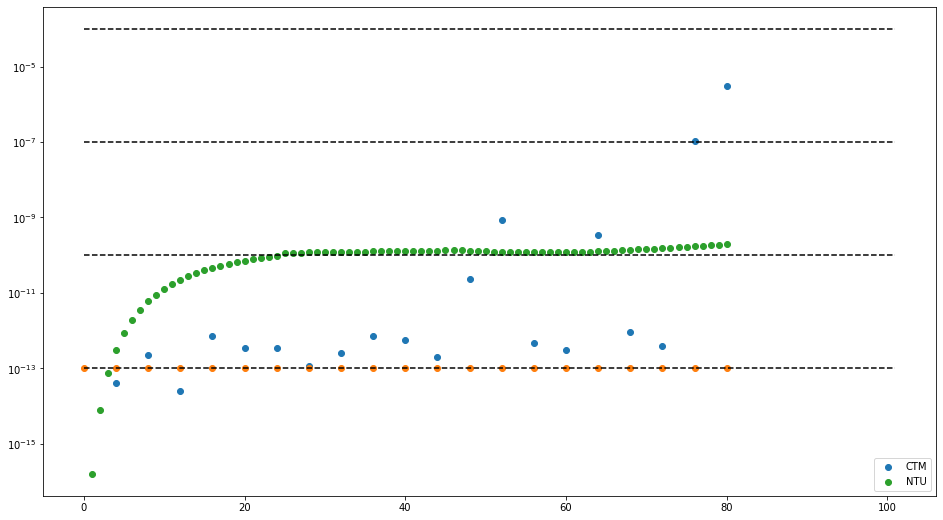

[80, (1.9586714869528855e-10-5.243931076824882e-27j)]


/tmp/ipykernel_65269/3011639741.py:27: ComplexWarning: Casting complex values to real discards the imaginary part
  print([int(np.array(NTUerror)[-1,0]),np.array(NTUerror)[-1,1]])


In [47]:
CTMerror = []
NTUerror =[]
chis=[]
for i in range(101):
    try:
        NTUerror.append([i,dict(np.load(dir+"/PEPS_{:05d}.npz".format(i)))['NTUerror'].min()])
    except: continue
    try:
        CTMerror.append([i,dict(np.load(dir+"/RHOA_{:05d}.npz".format(i)))['error'].min()])
        chis.append([i,dict(np.load(dir+"/RHOA_{:05d}.npz".format(i)))['C_NW_A'].shape[0]])
    except: continue

CTMerror = np.array(CTMerror)
NTUerror = np.array(NTUerror)
chis = np.array(chis)
plt.yscale('log')
plt.scatter(np.array(CTMerror)[:,0],np.array(CTMerror)[:,1],label='CTM')
plt.scatter(np.array(CTMerror)[:,0],[1e-13]*len(np.array(CTMerror)[:,0]))
plt.scatter(np.array(NTUerror)[:,0],np.array(NTUerror)[:,1],label='NTU')
plt.plot([0,SPECS['n']+1],[1e-13]*2,'--', color='k')
plt.plot([0,SPECS['n']+1],[1e-4]*2,'--', color='k')
plt.plot([0,SPECS['n']+1],[1e-7]*2,'--', color='k')
plt.plot([0,SPECS['n']+1],[1e-10]*2,'--', color='k')
plt.legend()
plt.show()
# plt.plot(chis[:,0],chis[:,1])
print([int(np.array(NTUerror)[-1,0]),np.array(NTUerror)[-1,1]])
# print(CTMerror[:,1])

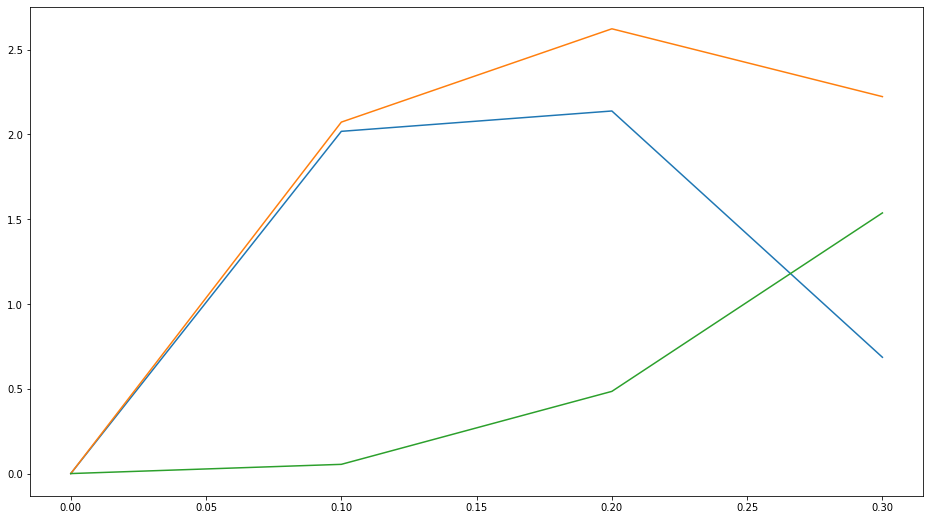

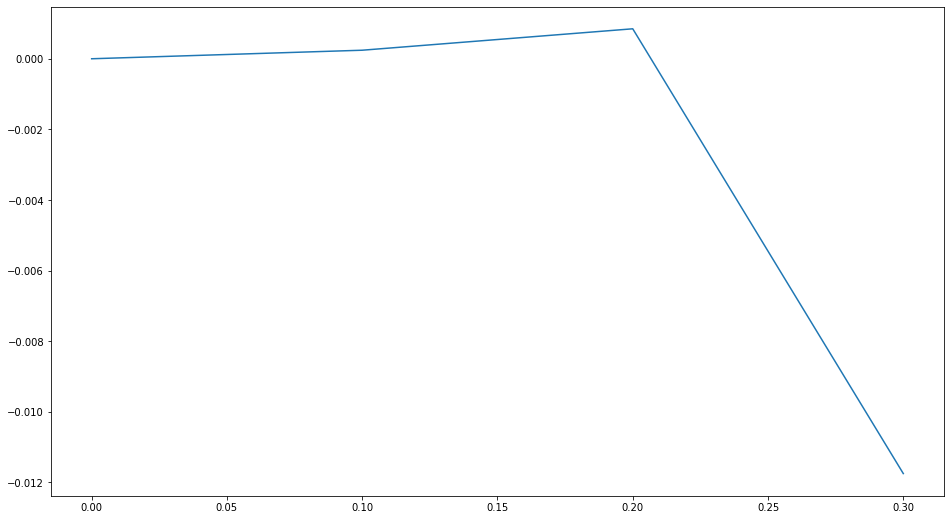

In [48]:
arA, arB = [], []
aa = []
dist = 1
ts = []

E_AB_WE_aah, E_AB_NS_aah = [], []
E_BA_WE_aah, E_BA_NS_aah = [], []
E_AB_WE_aha, E_AB_NS_aha = [], []
E_BA_WE_aha, E_BA_NS_aha = [], []
n, nn = [], []

for i in range(0,SPECS['n']+1,20):
    try:
        aa.append([i,dict(np.load(dir+"/RHOA_{:05d}.npz".format(i)))['C_NW_A']])
        corrAAH_WE = dict(np.load(dir + "/CORR_AAH_WE_{:05d}.npz".format(i)))
        corrAHA_WE = dict(np.load(dir + "/CORR_AHA_WE_{:05d}.npz".format(i)))
        corrAAH_NS = dict(np.load(dir + "/CORR_AAH_NS_{:05d}.npz".format(i)))
        corrAHA_NS = dict(np.load(dir + "/CORR_AHA_NS_{:05d}.npz".format(i)))
        PEPS = np.load(dir + ('/PEPS_{:05d}.npz'.format(i)))
        ENV = dict(np.load(dir + "/RHOA_{:05d}.npz".format(i)))
        n.append(np.trace(ENV['rhoA'] @ np.diag([0,1,2]))/2+np.trace(ENV['rhoB'] @ np.diag([0,1,2]))/2)
        nn.append(np.trace(ENV['rhoA'] @ np.diag([0,1,4]))/2+np.trace(ENV['rhoB'] @ np.diag([0,1,4]))/2)
        ts.append(PEPS['iter'] * PEPS['dt'])

        E_AB_WE_aha.append(corrAHA_WE['corA'][dist])
        E_AB_WE_aah.append(corrAAH_WE['corA'][dist])
        E_BA_WE_aha.append(corrAHA_WE['corB'][dist])
        E_BA_WE_aah.append(corrAAH_WE['corB'][dist])
        E_AB_NS_aha.append(corrAHA_NS['corA'][dist])
        E_AB_NS_aah.append(corrAAH_NS['corA'][dist])
        E_BA_NS_aha.append(corrAHA_NS['corB'][dist])
        E_BA_NS_aah.append(corrAAH_NS['corB'][dist])
    except:
        continue

n = np.array(n) - n[0]
nn = np.array(nn) - nn[0]
E_AB_WE_aha = np.array(E_AB_WE_aha)
E_AB_WE_aah = np.array(E_AB_WE_aah)
E_BA_WE_aha = np.array(E_BA_WE_aha)
E_BA_WE_aah = np.array(E_BA_WE_aah)
E_AB_NS_aha = np.array(E_AB_NS_aha)
E_AB_NS_aah = np.array(E_AB_NS_aah)
E_BA_NS_aha = np.array(E_BA_NS_aha)
E_BA_NS_aah = np.array(E_BA_NS_aah)

S = (E_BA_NS_aha+E_BA_NS_aah+E_AB_NS_aha+E_AB_NS_aah+E_BA_WE_aha+E_BA_WE_aah+E_AB_WE_aha+E_AB_WE_aah)
HU = SPECS['U']/2 * (nn - n) * 8
energy = -SPECS['J'] * S + HU

plt.plot(ts,S)
plt.plot(ts,HU)
plt.plot(ts,energy)
plt.show()

plt.plot(ts,n)

In [49]:
# arA, arB = [], []
# aa = []
# dist = 1
# ttts = []
#
# E_AB_WE_aah, E_AB_NS_aah = [], []
# E_BA_WE_aah, E_BA_NS_aah = [], []
# E_AB_WE_aha, E_AB_NS_aha = [], []
# E_BA_WE_aha, E_BA_NS_aha = [], []
#
# for i in range(0,SPECS['n']+1,20):
#     print(i)
#     PEPS = dict(np.load(dir + "/PEPS_{:05d}.npz".format(i)))
#     a = np.diag(np.sqrt(np.arange(1, PEPS['A'].shape[-1])), k=1)
#     ah = a.T
#     rhoAB_WE = CTMRG_better.Rho1E(PEPS['A'],PEPS['B']).reshape(3,3,3,3)
#     rhoBA_WE = CTMRG_better.Rho1E(PEPS['B'],PEPS['A']).reshape(3,3,3,3)
#     rhoAB_WE = rhoAB_WE / ncon([rhoAB_WE],([1,2,1,2]))
#     rhoBA_WE = rhoAB_WE / ncon([rhoBA_WE],([1,2,1,2]))
#     PEPS = NTU.__rot(PEPS)
#     rhoAB_NS = CTMRG_better.Rho1E(PEPS['A'],PEPS['B']).reshape(3,3,3,3)
#     rhoBA_NS = CTMRG_better.Rho1E(PEPS['B'],PEPS['A']).reshape(3,3,3,3)
#     rhoAB_NS = rhoAB_NS / ncon([rhoAB_NS],([1,2,1,2]))
#     rhoBA_NS = rhoAB_NS / ncon([rhoBA_NS],([1,2,1,2]))
#
#     E_AB_WE_aah.append(ncon([rhoAB_WE,a,ah],([1,2,3,4],[3,1],[4,2])))
#     E_AB_WE_aha.append(ncon([rhoAB_WE,ah,a],([1,2,3,4],[3,1],[4,2])))
#     E_BA_WE_aah.append(ncon([rhoBA_WE,a,ah],([1,2,3,4],[3,1],[4,2])))
#     E_BA_WE_aha.append(ncon([rhoBA_WE,ah,a],([1,2,3,4],[3,1],[4,2])))
#     E_AB_NS_aah.append(ncon([rhoAB_NS,a,ah],([1,2,3,4],[3,1],[4,2])))
#     E_AB_NS_aha.append(ncon([rhoAB_NS,ah,a],([1,2,3,4],[3,1],[4,2])))
#     E_BA_NS_aah.append(ncon([rhoBA_NS,a,ah],([1,2,3,4],[3,1],[4,2])))
#     E_BA_NS_aha.append(ncon([rhoBA_NS,ah,a],([1,2,3,4],[3,1],[4,2])))
#     ttts.append(PEPS['iter'] * PEPS['dt'])
#
# clear_output(True)
# E_AB_WE_aha = np.array(E_AB_WE_aha)
# E_AB_WE_aah = np.array(E_AB_WE_aah)
# E_BA_WE_aha = np.array(E_BA_WE_aha)
# E_BA_WE_aah = np.array(E_BA_WE_aah)
# E_AB_NS_aha = np.array(E_AB_NS_aha)
# E_AB_NS_aah = np.array(E_AB_NS_aah)
# E_BA_NS_aha = np.array(E_BA_NS_aha)
# E_BA_NS_aah = np.array(E_BA_NS_aah)
#
# average = (E_BA_NS_aha+E_BA_NS_aah+E_AB_NS_aha+E_AB_NS_aah+E_BA_WE_aha+E_BA_WE_aah+E_AB_WE_aha+E_AB_WE_aah)/8
#
# plt.clf()
# plt.title("only REAL")
# plt.scatter(ttts, 2*average.real, label='aah+aha average REAL')
# # plt.plot(ts[:14], 2*4*4.9*np.array(ts[:14])**2, label='aah+aha average REAL')
# plt.plot([ttts[0],ttts[-1]],[0,0])
# plt.legend()
# plt.show()
#
# plt.clf()
# plt.title("only REAL")
# plt.scatter(ttts[:len(E_AB_WE_aha)], 1/2*(E_BA_WE_aha+E_BA_WE_aah+E_AB_WE_aha+E_AB_WE_aah).real, label='aah+aha WE REAL', linestyle=(7.5, (15, 15)))
# plt.scatter(ttts[:len(E_AB_WE_aha)], 1/2*(E_BA_NS_aha+E_BA_NS_aah+E_AB_NS_aha+E_AB_NS_aah).real, label='aah+aha NS REAL', linestyle=(-7.5, (15, 15)))
# plt.legend()
# plt.show()
#
# plt.clf()
# plt.title("only REAL")
# plt.scatter(ttts[:len(E_AB_WE_aha)], 1/4*(E_BA_NS_aah+E_BA_WE_aah+E_AB_NS_aah+E_AB_WE_aah).real, label='aah REAL', linestyle=(7.5, (15, 15)))
# plt.scatter(ttts[:len(E_AB_WE_aha)], 1/4*(E_BA_NS_aha+E_BA_WE_aha+E_AB_NS_aha+E_AB_WE_aha).real, label='aha REAL', linestyle=(-7.5, (15, 15)))
# plt.legend()
# plt.show()
#
# plt.clf()
# plt.title("only IMAG")
# plt.scatter(ttts[:len(E_AB_WE_aha)], (E_BA_NS_aha+E_BA_NS_aah+E_AB_NS_aha+E_AB_NS_aah+E_BA_WE_aha+E_BA_WE_aah+E_AB_WE_aha+E_AB_WE_aah).imag, label='aah+aha A IMAG')
# plt.scatter(ttts[:len(E_AB_WE_aha)], (E_BA_NS_aha+E_BA_NS_aah+E_AB_NS_aha+E_AB_NS_aah+E_BA_WE_aha+E_BA_WE_aah+E_AB_WE_aha+E_AB_WE_aah).imag, label='aah+aha B IMAG')
# plt.legend()
# plt.show()
#
# print(np.std((E_BA_NS_aah+E_BA_WE_aah+E_AB_NS_aah+E_AB_WE_aah))/4)

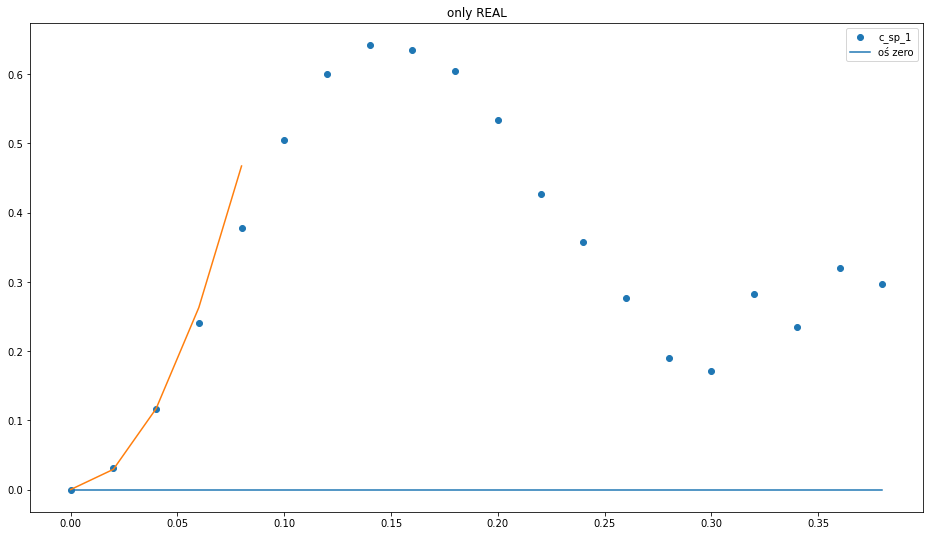

0.09570170018475313


In [56]:
arA, arB = [], []
aa = []
dist = 1
ts = []

E_AB_WE_aah, E_AB_NS_aah = [], []
E_BA_WE_aah, E_BA_NS_aah = [], []
E_AB_WE_aha, E_AB_NS_aha = [], []
E_BA_WE_aha, E_BA_NS_aha = [], []

for i in range(SPECS['n']+1):
    try:
        aa.append([i,dict(np.load(dir+"/RHOA_{:05d}.npz".format(i)))['C_NW_A']])
        corrAAH_WE = dict(np.load(dir + "/CORR_AAH_WE_{:05d}.npz".format(i)))
        corrAHA_WE = dict(np.load(dir + "/CORR_AHA_WE_{:05d}.npz".format(i)))
        corrAAH_NS = dict(np.load(dir + "/CORR_AAH_NS_{:05d}.npz".format(i)))
        corrAHA_NS = dict(np.load(dir + "/CORR_AHA_NS_{:05d}.npz".format(i)))
        PEPS = np.load(dir + ('/PEPS_{:05d}.npz'.format(i)))
        ts.append(PEPS['iter'] * PEPS['dt'])

        E_AB_WE_aha.append(corrAHA_WE['corA'][dist])
        E_AB_WE_aah.append(corrAAH_WE['corA'][dist])
        E_BA_WE_aha.append(corrAHA_WE['corB'][dist])
        E_BA_WE_aah.append(corrAAH_WE['corB'][dist])
        E_AB_NS_aha.append(corrAHA_NS['corA'][dist])
        E_AB_NS_aah.append(corrAAH_NS['corA'][dist])
        E_BA_NS_aha.append(corrAHA_NS['corB'][dist])
        E_BA_NS_aah.append(corrAAH_NS['corB'][dist])
    except:
        continue

ts=np.array(ts)
E_AB_WE_aha = np.array(E_AB_WE_aha)
E_AB_WE_aah = np.array(E_AB_WE_aah)
E_BA_WE_aha = np.array(E_BA_WE_aha)
E_BA_WE_aah = np.array(E_BA_WE_aah)
E_AB_NS_aha = np.array(E_AB_NS_aha)
E_AB_NS_aah = np.array(E_AB_NS_aah)
E_BA_NS_aha = np.array(E_BA_NS_aha)
E_BA_NS_aah = np.array(E_BA_NS_aah)

average = (E_BA_NS_aha+E_BA_NS_aah+E_AB_NS_aha+E_AB_NS_aah+E_BA_WE_aha+E_BA_WE_aah+E_AB_WE_aha+E_AB_WE_aah)/8

plt.clf()
plt.title("only REAL")
plt.scatter(ts, 2*average.real, label='c_sp_1')
# plt.plot(ts[:14], 2*4*4.9*np.array(ts[:14])**2, label='aah+aha average REAL')
plt.plot([ts[0],ts[-1]],[0,0],label='oś zero')
plt.plot(ts[:5],(2*average[2].real / ts[2]**2)*ts[:5]**2)
# plt.plot(ts,100*n,label='100*(liczba cząstek na oczko - 1)')
plt.legend()
plt.show()

# plt.clf()
# plt.title("only REAL")
# plt.scatter(ts[:len(E_AB_WE_aha)], 1/2*(E_BA_WE_aha+E_BA_WE_aah+E_AB_WE_aha+E_AB_WE_aah).real, label='aah+aha WE REAL', linestyle=(7.5, (15, 15)))
# plt.scatter(ts[:len(E_AB_WE_aha)], 1/2*(E_BA_NS_aha+E_BA_NS_aah+E_AB_NS_aha+E_AB_NS_aah).real, label='aah+aha NS REAL', linestyle=(-7.5, (15, 15)))
# plt.legend()
# plt.show()
#
# plt.clf()
# plt.title("only REAL")
# plt.scatter(ts[:len(E_AB_WE_aha)], 1/4*(E_BA_NS_aah+E_BA_WE_aah+E_AB_NS_aah+E_AB_WE_aah).real, label='aah REAL', linestyle=(7.5, (15, 15)))
# plt.scatter(ts[:len(E_AB_WE_aha)], 1/4*(E_BA_NS_aha+E_BA_WE_aha+E_AB_NS_aha+E_AB_WE_aha).real, label='aha REAL', linestyle=(-7.5, (15, 15)))
# plt.legend()
# plt.show()
#
# plt.clf()
# plt.title("only IMAG")
# plt.scatter(ts[:len(E_AB_WE_aha)], (E_BA_NS_aha+E_BA_NS_aah+E_AB_NS_aha+E_AB_NS_aah+E_BA_WE_aha+E_BA_WE_aah+E_AB_WE_aha+E_AB_WE_aah).imag, label='aah+aha A IMAG')
# plt.scatter(ts[:len(E_AB_WE_aha)], (E_BA_NS_aha+E_BA_NS_aah+E_AB_NS_aha+E_AB_NS_aah+E_BA_WE_aha+E_BA_WE_aah+E_AB_WE_aha+E_AB_WE_aah).imag, label='aah+aha B IMAG')
# plt.legend()
# plt.show()

print(np.std((E_BA_NS_aah+E_BA_WE_aah+E_AB_NS_aah+E_AB_WE_aah))/4)

In [62]:
print("<AA> == t^2 * J/U", (2*average[1].real / ts[1]**2)/4.9)

<AA> == t^2 * J/U 15.722008295435232


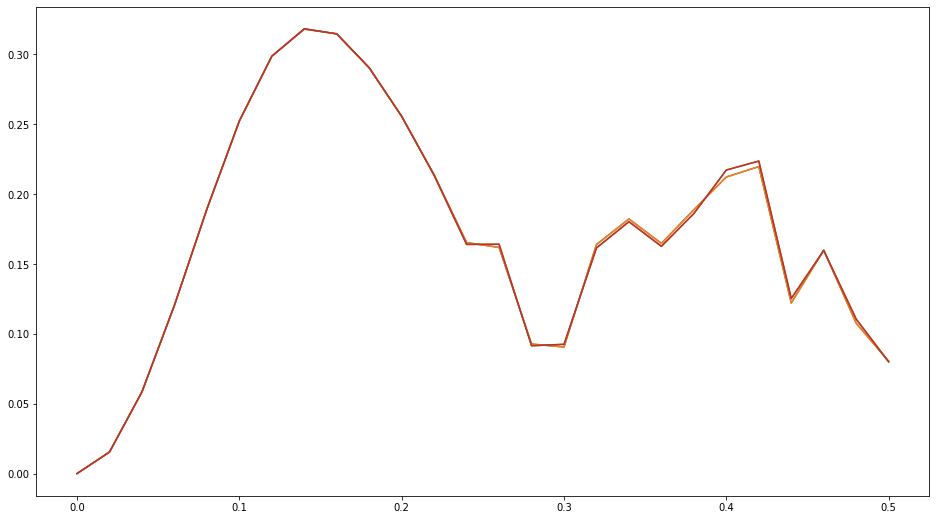

In [23]:
E_AB_aah_1, E_AB_aha_1, E_BA_aah_1, E_BA_aha_1 = [], [], [], []
ts = []
for i in range(SPECS['n'] + 1):
    try:
        PEPS = np.load(dir + ('/PEPS_{:05d}.npz'.format(i)))
        env = np.load(dir + ('/RHOA_{:05d}.npz'.format(i)))
        A = PEPS['A']
        B = PEPS['B']
        ts.append(SPECS['dt'] * i)

        a = np.diag(np.sqrt(np.arange(1, PEPS['A'].shape[-1])), k=1)
        ah = a.T

        cons = ([-1, -2, -3, -4, 1], [-5, 1])
        Aa = ncon([A, a], cons)
        Bah = ncon([B, ah], cons)
        Aah = ncon([A, ah], cons)
        Ba = ncon([B, a], cons)
        Ac = A.conj()
        Bc = B.conj()
        cons1 = ([2, 11], [11, 19, 9, 10], [19, 24, 17, 18], [24, 25], [25, 21, 22, 23], [21, 20], [20, 12, 13, 14],
                 [12, 3, 4, 6], [3, 1], [1, 2, 5, 7], [4, 15, 9, 5, 8], [6, 16, 10, 7, 8], [13, 22, 17, 15, 26],
                 [14, 23, 18, 16, 26])
        E_AB_aah_1.append(ncon(
            [env['C_SW_A'], env['E_S_B'], env['E_S_A'], env['C_SE_B'], env['E_E_A'], env['C_NE_B'], env['E_N_A'],
             env['E_N_B'], env['C_NW_A'], env['E_W_B'], Aa, Ac, Bah, Bc],
            cons1) / ncon(
            [env['C_SW_A'], env['E_S_B'], env['E_S_A'], env['C_SE_B'], env['E_E_A'], env['C_NE_B'], env['E_N_A'],
             env['E_N_B'], env['C_NW_A'], env['E_W_B'], A, Ac, B, Bc],
            cons1))
        E_AB_aha_1.append(ncon(
            [env['C_SW_A'], env['E_S_B'], env['E_S_A'], env['C_SE_B'], env['E_E_A'], env['C_NE_B'], env['E_N_A'],
             env['E_N_B'], env['C_NW_A'], env['E_W_B'], Aah, Ac, Ba, Bc],
            cons1) / ncon(
            [env['C_SW_A'], env['E_S_B'], env['E_S_A'], env['C_SE_B'], env['E_E_A'], env['C_NE_B'], env['E_N_A'],
             env['E_N_B'], env['C_NW_A'], env['E_W_B'], A, Ac, B, Bc],
            cons1))
        E_BA_aah_1.append(ncon(
            [env['C_SW_B'], env['E_S_A'], env['E_S_B'], env['C_SE_A'], env['E_E_B'], env['C_NE_A'], env['E_N_B'],
             env['E_N_A'], env['C_NW_B'], env['E_W_A'], Ba, Bc, Aah, Ac],
            cons1) / ncon(
            [env['C_SW_B'], env['E_S_A'], env['E_S_B'], env['C_SE_A'], env['E_E_B'], env['C_NE_A'], env['E_N_B'],
             env['E_N_A'], env['C_NW_B'], env['E_W_A'], B, Bc, A, Ac],
            cons1))
        E_BA_aha_1.append(ncon(
            [env['C_SW_B'], env['E_S_A'], env['E_S_B'], env['C_SE_A'], env['E_E_B'], env['C_NE_A'], env['E_N_B'],
             env['E_N_A'], env['C_NW_B'], env['E_W_A'], Bah, Bc, Aa, Ac],
            cons1) / ncon(
            [env['C_SW_B'], env['E_S_A'], env['E_S_B'], env['C_SE_A'], env['E_E_B'], env['C_NE_A'], env['E_N_B'],
             env['E_N_A'], env['C_NW_B'], env['E_W_A'], B, Bc, A, Ac],
            cons1))
    except: continue

E_AB_aah_1, E_AB_aha_1, E_BA_aah_1, E_BA_aha_1 = np.array(E_AB_aah_1), np.array(E_AB_aha_1), np.array(E_BA_aah_1), np.array(E_BA_aha_1)

plt.plot(ts,E_AB_aah_1.real)
plt.plot(ts,E_AB_aha_1.real)
plt.plot(ts,E_BA_aah_1.real)
plt.plot(ts,E_BA_aha_1.real)

In [24]:

a = np.diag(np.sqrt(np.arange(1, 3)), k=1)
ah = a.T
n = ah @ a
nn = n @ n

In [25]:
nn

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 4.]])

In [26]:
for key in dict(env):
    if key[:2]=='C_':
        C = env[key]
        print(key)
    if key[:2]=='E_':
        E = env[key]
        print(key)

E_E_A
E_E_B
E_W_A
E_W_B
E_S_A
E_S_B
E_N_A
E_N_B
C_NW_A
C_SW_B
C_NE_B
C_SE_A
C_NW_B
C_SW_A
C_NE_A
C_SE_B


In [27]:
E[:24,:24,:,:].shape

(24, 24, 7, 7)

In [28]:
chi = 18
env = dict(np.load(dir + ('/RHOA_{:05d}.npz'.format(105))))
for key in list(env):
    print(key)
    if key[:2]=='C_':
        if env[key].shape[0] > chi:
            env[key] = env[key][:chi,:chi]
        else:
            buff = np.zeros((chi,chi),dtype=np.complex128)
            buff[:env[key].shape[0],:env[key].shape[1]] = env[key]
            env[key] = buff
    if key[:2]=='E_':
        if env[key].shape[0] > chi:
            env[key] = env[key][:chi,:chi,:,:]
        else:
            buff = np.zeros((chi,chi,env[key].shape[-2],env[key].shape[-1]),dtype=np.complex128)
            buff[:env[key].shape[0],:env[key].shape[1],:env[key].shape[-2],:env[key].shape[-1]] = env[key]
            env[key] = buff

FileNotFoundError: [Errno 2] No such file or directory: './BH_NEWNTUd=5_sud_28_7_1.0_4.9_0.001_500/RHOA_00105.npz'

In [ ]:
env['C_NE_A'].shape

In [ ]:
import BoseHubbard, NTU
import numpy as np

PEPS=dict(np.load("./BH_NEWNTUd=5_sud_2_10_1.0_4.9_0.01_50/PEPS_00017.npz"))
GATES = BoseHubbard.TrotterGate(3, 9, 0.005, J=1, U=4.9, mu=0)
PEPS['GA'] = GATES['GA']
PEPS['GB'] = GATES['GB']

In [ ]:
PEPS = NTU.__step(PEPS, ifprint=True, precision=1e-20, ifsvdu=False)

In [ ]:
np.logspace(-1,-10,10,endpoint=True)

In [ ]:
from time import time
eee=[]
for rc in np.logspace(-6,-30,8,endpoint=True):
    t0=time()
    for i in range(300):
        A=np.random.randn(100,100)
        b=np.random.randn(100)
        np.linalg.lstsq(A,b,rcond=rc)
    print([rc,time()-t0])
    eee.append([rc,time()-t0])
plt.plot()